Problem Statement:
Study the dataset and write a program to decide the "Y" based on the different parameters of the data.

# Using Decision tree classifier

In [ ]:
#Importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Reading Data set

In [5]:
data = pd.read_csv("ionosphere.csv")

In [ ]:
#Doing basic Data cleaning

In [6]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X26,X27,X28,X29,X30,X31,X32,X33,X34,Y
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [7]:
data["Y"].unique()

array(['g', 'b'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      351 non-null    int64  
 1   X2      351 non-null    int64  
 2   X3      351 non-null    float64
 3   X4      351 non-null    float64
 4   X5      351 non-null    float64
 5   X6      351 non-null    float64
 6   X7      351 non-null    float64
 7   X8      351 non-null    float64
 8   X9      351 non-null    float64
 9   X10     351 non-null    float64
 10  X11     351 non-null    float64
 11  X12     351 non-null    float64
 12  X13     351 non-null    float64
 13  X14     351 non-null    float64
 14  X15     351 non-null    float64
 15  X16     351 non-null    float64
 16  X17     351 non-null    float64
 17  X18     351 non-null    float64
 18  X19     351 non-null    float64
 19  X20     351 non-null    float64
 20  X21     351 non-null    float64
 21  X22     351 non-null    float64
 22  X2

In [9]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
Y      0
dtype: int64

In [11]:
data.Y.value_counts()

g    225
b    126
Name: Y, dtype: int64

In [15]:
colnames = list(data.columns)

In [16]:
colnames

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'Y']

In [18]:
Predictors = colnames[0:34]
target = colnames[34]

In [19]:
train, test = train_test_split(data, test_size= 0.2)

In [61]:
# training and testing data and fitting it in the model

In [20]:
model01 =  DecisionTreeClassifier(criterion="entropy")

In [21]:
model01.fit(train[Predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
pred01 = model01.predict(test[Predictors])

In [23]:
pd.Series(pred01).value_counts()

g    48
b    23
dtype: int64

In [24]:
pd.crosstab(test[target], pred01)

col_0,b,g
Y,,
b,21,6
g,2,42


In [25]:
acc= (21+42)/(21+42+6+2)

In [62]:
#getting accuracy

In [26]:
acc

0.8873239436619719

In [28]:
a1 = np.mean(pred01==test.Y)
a1

0.8873239436619719

In [29]:
train_pred02 = model01.predict(train[Predictors])

In [30]:
pd.crosstab(train[target], train_pred02)

col_0,b,g
Y,,
b,99,0
g,0,181


In [31]:
a2 = np.mean(train_pred02 == train.Y)
a2

1.0

# KNN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv("ionosphere.csv")

In [ ]:
#data cleaning

In [3]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X26,X27,X28,X29,X30,X31,X32,X33,X34,Y
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Standardize the Variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(df.drop('Y',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34
0,0.348433,0.0,0.712372,-0.234257,0.484208,-0.201735,0.577059,-0.954679,0.964074,-0.297510,...,0.297728,-0.867565,-0.253868,-0.713971,-0.288290,-0.617039,0.122937,-1.055054,-0.312221,-0.999595
1,0.348433,0.0,0.721648,-0.527811,0.634308,-1.037587,-1.339106,-2.029452,0.964074,-0.469482,...,-1.037790,-0.383054,-1.447849,-0.208419,-0.989185,-0.173530,-0.909063,-0.115213,-0.932605,-0.083286
2,0.348433,0.0,0.721648,-0.176998,0.768477,-0.241309,0.914531,-0.461494,0.746139,-0.350536,...,0.310141,-0.651896,0.093506,-0.276586,0.091389,-0.287320,0.441318,-0.464092,0.404443,-0.848591
3,0.348433,0.0,0.721648,-1.125172,0.768477,1.921340,0.329433,-2.152585,-1.010873,-0.375331,...,1.045426,1.926340,-0.049490,1.947300,1.080843,-0.341218,-0.167687,1.957315,-1.289826,2.107299
4,0.348433,0.0,0.721648,-0.155129,0.655594,-0.109918,0.754068,-0.676741,0.512838,-0.714742,...,-0.628910,-1.143025,-0.792950,-0.842112,-0.615818,-1.171144,-0.717726,-1.154227,-0.757673,-1.435736


Test Train Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Y'],
                                                    test_size=0.30)

Using KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
pred = knn.predict(X_test)

Prediction

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[30 15]
 [ 0 61]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           b       1.00      0.67      0.80        45
           g       0.80      1.00      0.89        61

    accuracy                           0.86       106
   macro avg       0.90      0.83      0.85       106
weighted avg       0.89      0.86      0.85       106



Choosing a K value

In [19]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

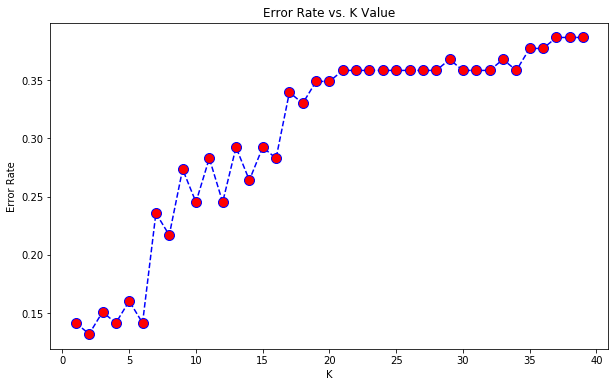

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that error is least at around 2 or 3

In [21]:
# NOW WITH K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=2


[[32 13]
 [ 1 60]]


              precision    recall  f1-score   support

           b       0.97      0.71      0.82        45
           g       0.82      0.98      0.90        61

    accuracy                           0.87       106
   macro avg       0.90      0.85      0.86       106
weighted avg       0.88      0.87      0.86       106



In [22]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[29 16]
 [ 0 61]]


              precision    recall  f1-score   support

           b       1.00      0.64      0.78        45
           g       0.79      1.00      0.88        61

    accuracy                           0.85       106
   macro avg       0.90      0.82      0.83       106
weighted avg       0.88      0.85      0.84       106



# Soo We can see Model is great at k=2

# Naive Bayes

In [23]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as ple
%matplotlib inline 

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [26]:
df = pd.read_csv("ionosphere.csv")

In [27]:
#data cleaning
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X26,X27,X28,X29,X30,X31,X32,X33,X34,Y
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [28]:
df["Y"].unique()

array(['g', 'b'], dtype=object)

In [29]:
df["Y"].value_counts()

g    225
b    126
Name: Y, dtype: int64

In [30]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [31]:
y = df.iloc[:, -1].values

In [33]:
features = df.columns[0:34]
cols= df.columns
labels = cols[34]
print(features, labels)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34'],
      dtype='object') Y


In [34]:
labels

'Y'

In [35]:
for feature in features:
    df[feature] = (df[features]- df[features].mean()) / df[features].std()

In [36]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X26,X27,X28,X29,X30,X31,X32,X33,X34,Y
0,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,...,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,g
1,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,...,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,b
2,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,...,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,g
3,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,...,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,b
4,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,...,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,0.347937,g


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [54]:
model01 = GaussianNB()
model01.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
pred01 = model01.predict(X_train)

In [56]:
pred01

array(['g', 'b', 'g', 'g', 'b', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g',
       'g', 'g', 'b', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'g',
       'g', 'b', 'g', 'g', 'b', 'b', 'g', 'g', 'g', 'b', 'g', 'g', 'g',
       'b', 'b', 'g', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g',
       'b', 'g', 'g', 'b', 'b', 'b', 'g', 'b', 'g', 'g', 'g', 'g', 'g',
       'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'g', 'b', 'g',
       'g', 'g', 'g', 'b', 'g', 'b', 'g', 'b', 'b', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g',
       'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'b', 'g', 'b', 'b',
       'g', 'g', 'g', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g',
       'b', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'b', 'b', 'g', 'g

In [57]:
print ("Accuracy = ",accuracy_score(pred01,y_train) )

Accuracy =  0.9142857142857143


In [58]:
pred02 = model01.predict(X_test)

In [59]:
print ("Accuracy = ",accuracy_score(pred02,y_test) )

Accuracy =  0.9150943396226415


In [60]:
pred03 = model01.predict(X)
print ("Accuracy = ",accuracy_score(pred03,y) )

Accuracy =  0.9145299145299145
